#  Задача 1.  Вводное задание.



Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval.

Чтобы прочитать из архива данные, используйте следующий код:

In [143]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

# Задача 2. Интерполяция полиномом Лагранжа.



Допишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [146]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        x = np.array(x)
        l = np.ones(len(self.xk))
        for i in range(len(self.xk)):
            #print(i)
            for j in range(len(self.xk)):
                #print(j)
                if (i==j):
                    continue
                l[i] *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
        return np.sum(l * self.yk)
        # YOUR CODE HERE
        raise NotImplementedError()

ERROR! Session/line number was not unique in database. History logging moved to new session 273


In [13]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

# Задача 3. Феномер Рунге



Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике.

In [134]:
import matplotlib.pyplot as plt

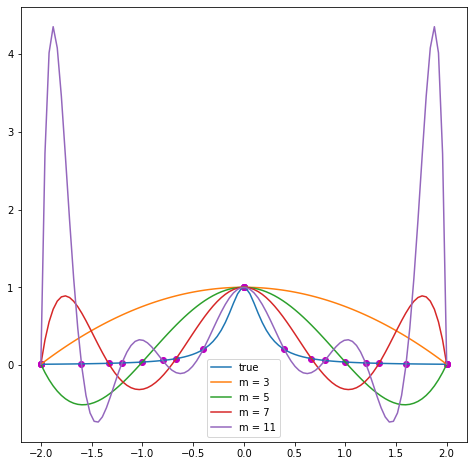

In [139]:
def f(x):
    return 1 / (1 + 25 * x * x)

ms = np.array((3, 5, 7, 11))
plt.figure(figsize=(8, 8))
x0 = np.linspace(-2, 2, 100)
plt.plot(x0, f(x0), label='true')
for m in ms:
    xs = np.linspace(-2, 2, m)
    lagr = LagrangeInterpolator(xs, f(xs))
    y = np.array([lagr(x) for x in x0])
    plt.plot(x0, y,label='m = {}'.format(m))
    plt.scatter(xs, f(xs), color='m')
plt.legend(loc='best')
plt.show()

Допишите функцию, которая возвращает узлы Чебышева.

In [44]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    x = (a + b) / 2 + (b-a) / 2 * np.cos((2 * np.array(range(n)) + 1) / 2 / n * np.pi)
    return np.sort(x)
    #raise NotImplementedError()

In [46]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


In [50]:
from scipy.interpolate import CubicSpline

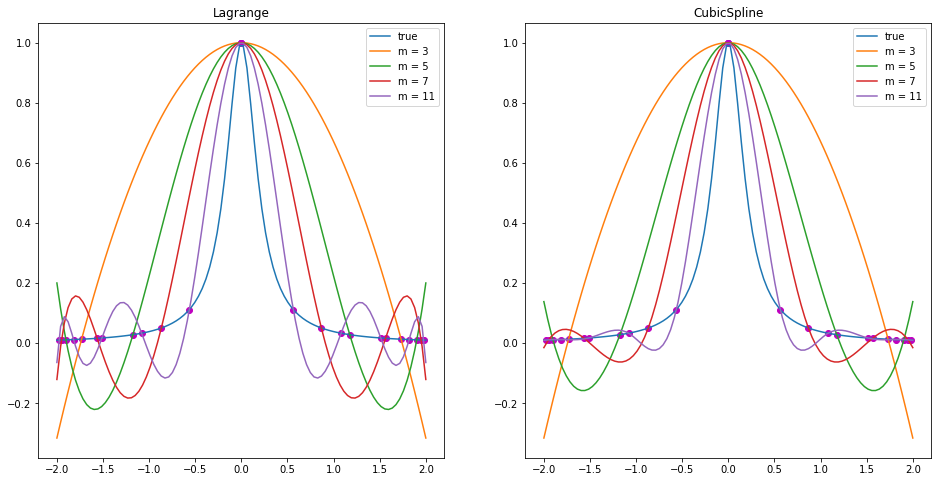

In [58]:
ms = np.array((3, 5, 7, 11))
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Lagrange')
x0 = np.linspace(-2, 2, 100)
plt.plot(x0, f(x0), label='true')
for m in ms:
    xs = cheb_nodes(m, -2, 2)
    lagr = LagrangeInterpolator(xs, f(xs))
    y = np.array([lagr(x) for x in x0])
    plt.plot(x0, y,label='m = {}'.format(m))
    plt.scatter(xs, f(xs), color='m')
plt.legend(loc='best')
plt.subplot(122)
plt.title('CubicSpline')
x0 = np.linspace(-2, 2, 100)
plt.plot(x0, f(x0), label='true')
for m in ms:
    xs = cheb_nodes(m, -2, 2)
    #xs = np.linspace(-2, 2, m)
    lagr = LagrangeInterpolator(xs, f(xs))
    y = CubicSpline(xs, f(xs))
    plt.plot(x0, y(x0),label='m = {}'.format(m))
    plt.scatter(xs, f(xs), color='m')
plt.legend(loc='best')
plt.show()

Видно, что при интерполяции в узлах Чебышева осцилляции всё ещё наблюдаются, но теперь они убывают с ростом $m$, а не увеличиваются. При интерполяции кубическим сплайном феномена Рунге не наблюдается

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

In [59]:
def f2(x, eps=0.21):
    return np.sqrt(eps * (2 + eps)) / 2 / np.pi / (1 + eps - np.cos(x))

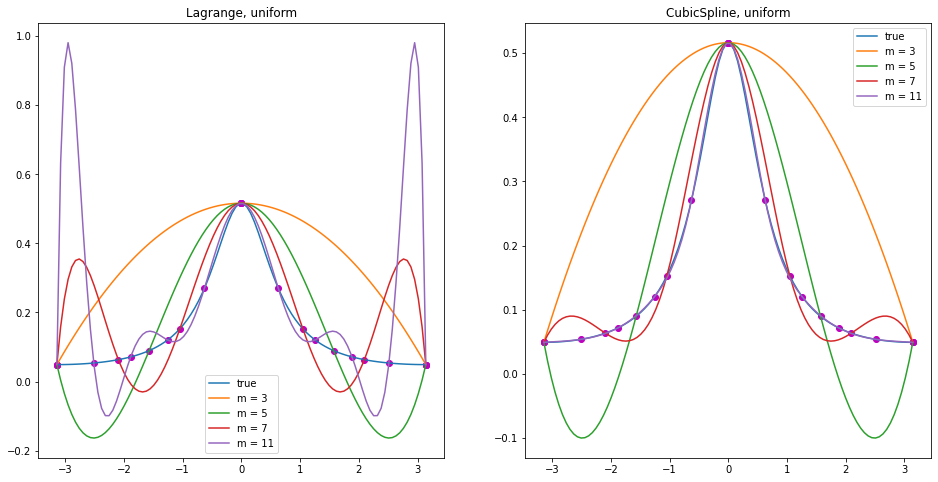

In [64]:
ms = np.array((3, 5, 7, 11))
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Lagrange, uniform')
x0 = np.linspace(-np.pi, np.pi, 100)
plt.plot(x0, f2(x0), label='true')
for m in ms:
    #xs = cheb_nodes(m, -2, 2)
    xs = np.linspace(-np.pi, np.pi, m)
    lagr = LagrangeInterpolator(xs, f2(xs))
    y = np.array([lagr(x) for x in x0])
    plt.plot(x0, y,label='m = {}'.format(m))
    plt.scatter(xs, f2(xs), color='m')
plt.legend(loc='best')
plt.subplot(122)
plt.title('CubicSpline, uniform')
x0 = np.linspace(-np.pi, np.pi, 100)
plt.plot(x0, f2(x0), label='true')
for m in ms:
    #xs = cheb_nodes(m, -np.pi, np.pi)
    xs = np.linspace(-np.pi, np.pi, m)
    lagr = LagrangeInterpolator(xs, f(xs))
    y = CubicSpline(xs, f2(xs))
    plt.plot(x0, y(x0),label='m = {}'.format(m))
    plt.scatter(xs, f2(xs), color='m')
plt.legend(loc='best')
plt.show()

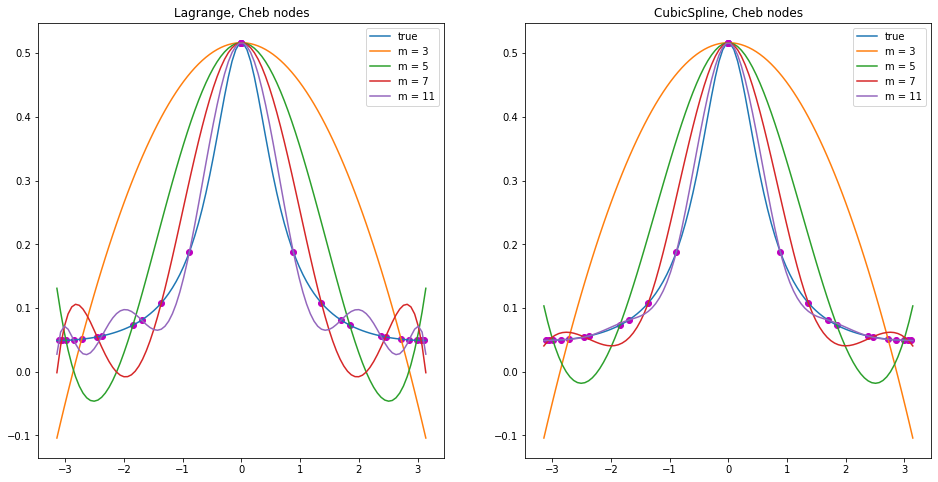

In [65]:
ms = np.array((3, 5, 7, 11))
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Lagrange, Cheb nodes')
x0 = np.linspace(-np.pi, np.pi, 100)
plt.plot(x0, f2(x0), label='true')
for m in ms:
    xs = cheb_nodes(m, -np.pi, np.pi)
    #xs = np.linspace(-np.pi, np.pi, m)
    lagr = LagrangeInterpolator(xs, f2(xs))
    y = np.array([lagr(x) for x in x0])
    plt.plot(x0, y,label='m = {}'.format(m))
    plt.scatter(xs, f2(xs), color='m')
plt.legend(loc='best')
plt.subplot(122)
plt.title('CubicSpline, Cheb nodes')
x0 = np.linspace(-np.pi, np.pi, 100)
plt.plot(x0, f2(x0), label='true')
for m in ms:
    xs = cheb_nodes(m, -np.pi, np.pi)
    #xs = np.linspace(-np.pi, np.pi, m)
    lagr = LagrangeInterpolator(xs, f(xs))
    y = CubicSpline(xs, f2(xs))
    plt.plot(x0, y(x0),label='m = {}'.format(m))
    plt.scatter(xs, f2(xs), color='m')
plt.legend(loc='best')
plt.show()

Аналогично предыдущей функции: при интерполяции полиномом Лагранжа на равномерной сетке наблюдается феномен Рунге, на сетке нулей Чебышева осцилляции с ростом $m$ уменьшаются; при кубическом сплайне на обеих сетках феномен Рунге не наблюдается

# Задача 4. Полиномы Чебышева.

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

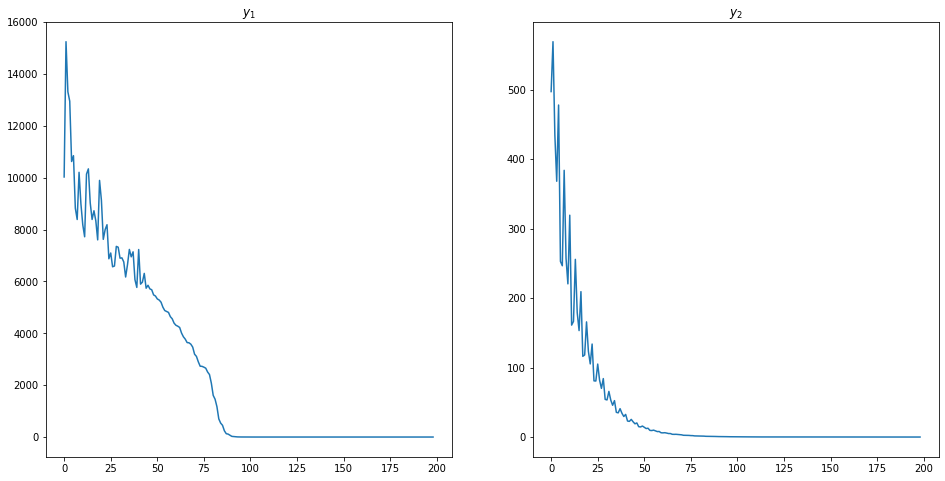

In [113]:
def f1(x):
    return np.sin(6 * x) + np.sin(60 * np.exp(x))

def f2(x):
    return 1 / (1 + 1000 * np.power(x + 0.5, 2)) + 1 / np.sqrt(1 + 1000 * np.power(x - 0.5, 2))


ns = np.array(range(1, 200))
epss = np.zeros(len(ns))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title(r'$y_1$')
x0 = np.linspace(-1, 1, 10000)
for i in range(len(ns)):
    p = np.polynomial.Chebyshev.interpolate(f1, ns[i])
    epss[i] = np.sum((p(x0) - f1(x0))*(p(x0) - f1(x0)))
plt.plot(epss)
plt.subplot(122)
plt.title(r'$y_2$')
x0 = np.linspace(-1, 1, 10000)
for i in range(len(ns)):
    p = np.polynomial.Chebyshev.interpolate(f2, ns[i])
    epss[i] = np.sum((p(x0) - f2(x0))*(p(x0) - f2(x0)))
plt.plot(epss)

Вывод: для первой функции требуется 90 узлов, для второй порядка 80

# Задача 5. Приближение разными функциями.

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

In [117]:
from scipy.optimize import curve_fit

def f1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1 *x + p2 * x * x + p3 * x * x * x + p4 * x * x * x * x + p5 * x * x * x * x * x

def f2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1*x + p2 * x * x + p3 * x * x * x) / (1 + q1 * x + q2 * x *x)

with np.load('data_interp.npz') as data:
  x4, y4 = data['x4'], data['y4']

popt1, pcov1 = curve_fit(f1, x4, y4)
popt2, pcov2 = curve_fit(f2, x4, y4)
print(popt1)

[-2.11808859e-09  1.00131512e+00  2.40987817e-08  3.13668689e-01
 -8.43216648e-08  2.01784388e-01]


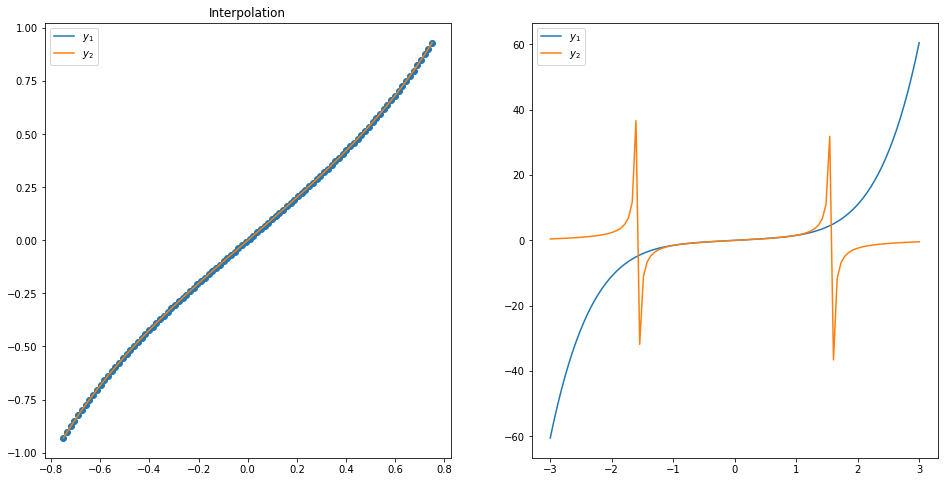

In [126]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(x4, y4)
plt.title('Interpolation')
x0 = np.linspace(-0.75, 0.75, 100)
plt.plot(x0, f1(x0, popt1[0], popt1[1], popt1[2], popt1[3], popt1[4], popt1[5]), label=r'$y_1$')
plt.plot(x0, f2(x0, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]), label=r'$y_2$')
plt.legend(loc='best')
plt.subplot(122)
x0 = np.linspace(-3, 3, 100)
plt.plot(x0, f1(x0, popt1[0], popt1[1], popt1[2], popt1[3], popt1[4], popt1[5]), label=r'$y_1$')
plt.plot(x0, f2(x0, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]), label=r'$y_2$')
plt.legend(loc='best')
plt.show()

In [124]:
eps1 = np.sum((y4 - f1(x4, popt1[0], popt1[1], popt1[2], popt1[3], popt1[4], popt1[5]))*(y4 - f1(x4, popt1[0], popt1[1], popt1[2], popt1[3], popt1[4], popt1[5])))
eps2 = np.sum((y4 - f2(x4, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5]))*(y4 - f2(x4, popt2[0], popt2[1], popt2[2], popt2[3], popt2[4], popt2[5])))

In [125]:
print(eps1)
print(eps2)

1.623748453714272e-06
1.4011562892828347e-10


Лучше интерполирует первая функция и она же лучше экстраполирует. Аналитически исходная функция похожа на гиперболический синус

# Задача 6. Аппроксимация узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным?

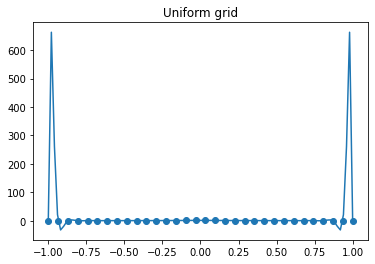

In [149]:
with np.load('data_interp.npz') as data:
  x5, y5 = data['x5'], data['y5']

plt.title('Uniform grid')
plt.scatter(x5, y5)
x0 = np.linspace(-1, 1, 100)
lagr = LagrangeInterpolator(x5, y5)
yl = np.array([lagr(x) for x in x0])
plt.plot(x0, yl)

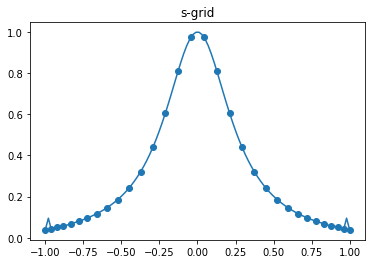

In [158]:
from scipy.optimize import minimize

def g(s):
    return (40320 * s + 6720 * s * s * s + 3024 * np.power(s, 5) + 1800 * np.power(s, 7) + 1225 * np.power(s, 9)) / 53089

def g2(s, x):
    return (g(s) - x)*(g(s) - x)

s0 = np.linspace(-1, 1, 100)
ss = [root(g2, 0, args=(x)).x for x in x5]

plt.title('s-grid')
plt.scatter(ss, y5)
x0 = np.linspace(-1, 1, 100)
lagr = LagrangeInterpolator(ss, y5)
yl = np.array([lagr(x) for x in x0])
plt.plot(x0, yl)

Явление Рунге действительно менее выражено